In [1]:
import pandas

print("Importing categorized names... ")
names = pandas.read_csv("data/names_cat.csv", usecols=["name", "n_publs", "likely_gender", "score"])
print("Names imported.")

Importing categorized names... 
Names imported.


In [2]:
# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print(names[:10])

                                        name  n_publs likely_gender  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        2        female      8
(David) Jing Dai            (David) Jing Dai        1          male      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng        2          male      2
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        2        female      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai        2          male      6
A Clara Kanmani              A Clara Kanmani        1        female      4
A Lun                                  A Lun        1          male      1
A Min Tjoa                        A Min Tjoa      211          male      2
A S Akshaya                      A S Akshaya        1          male      2
A'ang Subiyakto              A'ang Subiyakto        2        female      0


In [ ]:
# Get first name and last name from full name with NamSor
# Calculate the gender + score for the full name for those names with a score less than 7
# Save the new result (gender and score) in the df
# Compare the results. 
# To test if this makes sense: 
# Get sample of names with score less than 7
# send to api
# save results
# row: gender changed?: bool
# how much score changed?: int
# plot

In [3]:
print("Getting private key... ")
# Get private API Key for NamSor API v2 (contained in txt file)
key = ''

# Import personal key
with open("key.txt", "r") as file:
    key = file.read()

if(len(key) > 0):
    print("Got private key.")
else: 
    print("Could not find private key. Please check the file name and make sure you have an API key.")

Getting private key... 
Got private key.


In [4]:
# Setting up NamSor API v2 to get the gender of a name
# https://www.namsor.com/
# https://v2.namsor.com/NamSorAPIv2/apidoc.html
# using NamSor API v2 Python SDK
# https://github.com/namsor/namsor-python-sdk2
# licensed under GNU Affero General Public License v3.0

# Following script partly taken from https://github.com/namsor/namsor-python-sdk2 "Getting Started" 
# and adapted to keep key private and remove unnecessary lines.

print("Setting up NamSor API v2 connection settings...")

import openapi_client
from openapi_client.rest import ApiException

# Configure API key authorization: api_key
configuration = openapi_client.Configuration()
configuration.api_key['X-API-KEY'] = key
# create an instance of the API class
pers_api_instance = openapi_client.PersonalApi(openapi_client.ApiClient(configuration))

Setting up NamSor API v2 connection settings...


In [5]:
names_to_consider = names[names['score'] <= 3].sample(1000)
print("Will be parsing and reconsidering {} names.".format(len(names_to_consider)))

Will be parsing and reconsidering 1000 names.


In [6]:
# clean up names
# Strip numbers from a string: https://stackoverflow.com/questions/16849109/strip-out-numbers-from-a-string
# Remove white space at end from string: https://stackoverflow.com/questions/2372573/how-do-i-remove-whitespace-from-the-end-of-a-string-in-python
import re

def c(x):
    return pandas.Series([x, re.sub(r'\d+','',x).rstrip()], index=['name', 'clean_name'])
                         
cleaned_names = names_to_consider['name'].apply(c)
cleaned_names = cleaned_names.set_index('name')
print(len(cleaned_names))

names_to_consider=names_to_consider.merge(cleaned_names, how='left', left_index=True, right_index=True)
print(len(names_to_consider))

1000
1000


In [7]:
names_to_consider

,name,n_publs,likely_gender,score,clean_name
name,,,,,
J. L. Ramos Mas,J. L. Ramos Mas,3,male,2,J. L. Ramos Mas
Takuya Mototsuka,Takuya Mototsuka,2,male,3,Takuya Mototsuka
Bo-Han Ke,Bo-Han Ke,2,male,2,Bo-Han Ke
Shihan Qin,Shihan Qin,2,male,1,Shihan Qin
C. Feuerstein,C. Feuerstein,1,male,2,C. Feuerstein
Eirini Takoulidou,Eirini Takoulidou,5,female,2,Eirini Takoulidou
Chih-Jer Lin,Chih-Jer Lin,7,male,1,Chih-Jer Lin
Eugenie Shinkle,Eugenie Shinkle,1,female,3,Eugenie Shinkle
Honggui Xu,Honggui Xu,1,male,3,Honggui Xu


In [9]:
# Formatting the names using the API's models
def createPersonalNameIn(name):
    return openapi_client.PersonalNameIn(id=name, name=name)

In [12]:
# Now parsing the full names into first and last name, sending in
# one batch at a time and saving the result answer by answer.
# If the API calling gets interrupted:
# 1. check that no names got lost: ((len(names_to_consider)-len(result)) == len(names_stack))
# 2. If True: Restart only the code in the while loop.

batch_size = 1000 #1000 is the API limit given by NamSor
start = 0
end = batch_size
result = []

names_stack = list(names_to_consider['clean_name'])

while (len(names_stack) >= batch_size):
    try:
        current_batch = list(map(createPersonalNameIn, names_stack[start:end])) # create batch of names in correct format
        batch_personal_name_in = openapi_client.BatchPersonalNameIn(personal_names=current_batch) # convert batch to correct format
        api_response = pers_api_instance.parse_name_batch(batch_personal_name_in=batch_personal_name_in) # call API
        result = result + api_response.personal_names # save result
        
        del names_stack[start:end] # delete the names that have already been categorized from the stack
        
        # categorize remaining names if they are less than a batch size
        if(len(names_stack) < batch_size and len(names_stack) > 0):
            current_batch = list(map(createPersonalNameIn, names_stack)) # create the batch of remaining names
            batch_personal_name_in = openapi_client.BatchPersonalNameIn(personal_names=current_batch)
            api_response = pers_api_instance.parse_name_batch(batch_personal_name_in=batch_personal_name_in)
            result = result + api_response.personal_names
            names_stack = [] # empty the stack
        
        print("Batch of names analyzed")
    except ApiException as e:
        print("Exception when calling PersonalApi: gender_full_batch: %s\n" % e)


print("All batches analyzed.")

Batch of names analyzed
All batches analyzed.


In [26]:
names_to_consider = names_to_consider.set_index('clean_name')

In [29]:
# Convert results (list of openapi_client.models.PersonalNameParsedOut) to (list of dictionaries)
print('Filling the results into the names dataframe...')
for oapi_el in result:
    name = oapi_el.first_last_name
    try:
        names_to_consider.at[oapi_el.name, 'first_name'] = name.first_name
        names_to_consider.at[oapi_el.name, 'last_name'] = name.last_name
    except:
        print(name)
        print(oapi_el)
    
print('Dataframe completed with API results. Here is a sample: {}'.format(names_to_consider[:10]))

Filling the results into the names dataframe...
Dataframe completed with API results. Here is a sample:                                                               name  n_publs  \
clean_name                                                                    
J. L. Ramos Mas                                    J. L. Ramos Mas        3   
Takuya Mototsuka                                  Takuya Mototsuka        2   
Bo-Han Ke                                                Bo-Han Ke        2   
Shihan Qin                                              Shihan Qin        2   
C. Feuerstein                                        C. Feuerstein        1   
Eirini Takoulidou                                Eirini Takoulidou        5   
Chih-Jer Lin                                          Chih-Jer Lin        7   
Eugenie Shinkle                                    Eugenie Shinkle        1   
Honggui Xu                                              Honggui Xu        1   
Bethany Scott              

In [32]:
print("Saving test names...")
names_to_consider.to_csv("data/names_improvement_test.csv")
print("Test names saved!")

Saving test names...
Test names saved!


In [43]:
# Formatting the names using the API's models
def createParsedPersonalNameIn(clean_name):
    first_name = names_to_consider.at[clean_name, 'first_name']
    last_name = names_to_consider.at[clean_name, 'last_name']
    return openapi_client.FirstLastNameIn(id=clean_name, first_name=first_name, last_name=last_name)

In [45]:
# Now parsing the full names into first and last name, sending in
# one batch at a time and saving the result answer by answer.
# If the API calling gets interrupted:
# 1. check that no names got lost: ((len(names_to_consider)-len(result)) == len(names_stack))
# 2. If True: Restart only the code in the while loop.

batch_size = 1000 #1000 is the API limit given by NamSor
start = 0
end = batch_size
result = []

names_stack = list(names_to_consider.index.values)

In [47]:
while (len(names_stack) >= batch_size):
    try:
        current_batch = list(map(createParsedPersonalNameIn, names_stack[start:end])) # create batch of names in correct format
        batch_first_last_name_in = openapi_client.BatchFirstLastNameIn(personal_names=current_batch) # convert batch to correct format
        api_response = pers_api_instance.gender_batch(batch_first_last_name_in=batch_first_last_name_in) # call API
        result = result + api_response.personal_names # save result
        
        del names_stack[start:end] # delete the names that have already been categorized from the stack
        
        # categorize remaining names if they are less than a batch size
        if(len(names_stack) < batch_size and len(names_stack) > 0):
            current_batch = list(map(createPersonalNameIn, names_stack)) # create the batch of remaining names
            batch_first_last_name_in = openapi_client.BatchFirstLastNameIn(personal_names=current_batch)
            api_response = pers_api_instance.gender_batch(batch_first_last_name_in=batch_first_last_name_in)
            result = result + api_response.personal_names
            names_stack = [] # empty the stack
        
        print("Batch of names analyzed")
    except ApiException as e:
        print("Exception when calling PersonalApi: gender_full_batch: %s\n" % e)


print("All batches analyzed.")

Batch of names analyzed
All batches analyzed.


In [48]:
result

[{'first_name': 'J. L.',
  'gender_scale': -1.0,
  'id': 'J. L. Ramos Mas',
  'last_name': 'Ramos Mas',
  'likely_gender': 'male',
  'score': 1.5400074709831313}, {'first_name': 'Takuya',
  'gender_scale': -1.0,
  'id': 'Takuya Mototsuka',
  'last_name': 'Mototsuka',
  'likely_gender': 'male',
  'score': 1.8025969339102432}, {'first_name': 'Bo-Han',
  'gender_scale': -1.0,
  'id': 'Bo-Han Ke',
  'last_name': 'Ke',
  'likely_gender': 'male',
  'score': 1.3807678837738475}, {'first_name': 'Shihan',
  'gender_scale': -1.0,
  'id': 'Shihan Qin',
  'last_name': 'Qin',
  'likely_gender': 'male',
  'score': 1.442089902945955}, {'first_name': 'C.',
  'gender_scale': -1.0,
  'id': 'C. Feuerstein',
  'last_name': 'Feuerstein',
  'likely_gender': 'male',
  'score': 3.630263165861053}, {'first_name': 'Eirini',
  'gender_scale': 1.0,
  'id': 'Eirini Takoulidou',
  'last_name': 'Takoulidou',
  'likely_gender': 'female',
  'score': 2.1225609027709456}, {'first_name': 'Chih-Jer',
  'gender_scale': -1.

In [95]:
# Convert results (list of openapi_client.models.personal_name_gendered_out.PersonalNameGenderedOut) to (list of dictionaries)
print('Filling the results into the names dataframe...')
for oapi_el in result:
    names_to_consider.at[oapi_el.id, 'likely_gender_2'] = oapi_el.likely_gender
    names_to_consider.at[oapi_el.id, 'score_2'] = round(oapi_el.score)
    gender_dif = (names_to_consider.at[oapi_el.id, 'likely_gender'] != names_to_consider.at[oapi_el.id, 'likely_gender_2'])
    if (gender_dif):
        g_val = 1
    names_to_consider.at[oapi_el.id, 'gender_dif'] = gender_dif
    names_to_consider.at[oapi_el.id, 'score_dif'] = (names_to_consider.at[oapi_el.id, 'score_2'] - names_to_consider.at[oapi_el.id, 'score'])

print('Dataframe completed with API results. Here is a sample: {}'.format(names_to_consider[:50]))

Filling the results into the names dataframe...
Dataframe completed with API results. Here is a sample:                                               name  n_publs likely_gender  \
clean_name                                                                  
J. L. Ramos Mas                    J. L. Ramos Mas        3          male   
Takuya Mototsuka                  Takuya Mototsuka        2          male   
Bo-Han Ke                                Bo-Han Ke        2          male   
Shihan Qin                              Shihan Qin        2          male   
C. Feuerstein                        C. Feuerstein        1          male   
Eirini Takoulidou                Eirini Takoulidou        5        female   
Chih-Jer Lin                          Chih-Jer Lin        7          male   
Eugenie Shinkle                    Eugenie Shinkle        1        female   
Honggui Xu                              Honggui Xu        1          male   
Bethany Scott                        Bethany Scot

In [77]:
print("Saving test names...")
names_to_consider.to_csv("data/names_improvement_test.csv")
print("Test names saved!")

Saving test names...
Test names saved!


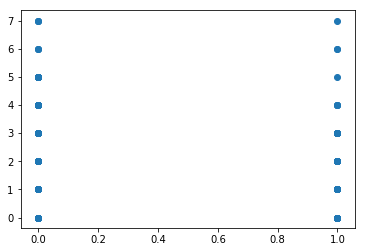

In [103]:
import matplotlib.pyplot as plt

plt.scatter(x=names_to_consider['gender_dif'], y=names_to_consider['score_2'])

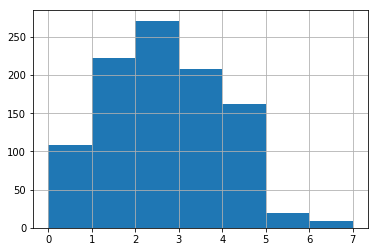

In [108]:
names_to_consider['score_2'].hist(bins=7)

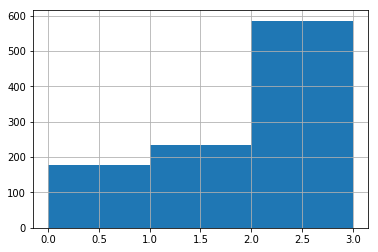

In [134]:
names_to_consider['score'].hist(bins=3)

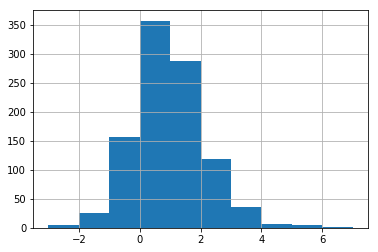

In [109]:
names_to_consider['score_dif'].hist()

In [206]:
names_by_score_dif = names_to_consider.groupby(['score_dif', 'gender_dif'])

In [207]:
names_by_score_dif = names_by_score_dif.agg({'score':'count'}) # score just counts how many entries there are per score_dif and gender_dif

In [240]:
score_diffs = list(map(lambda x: x[0], names_by_score_dif.index.values))
gender_diffs = list(map(lambda x: x[1], names_by_score_dif.index.values))

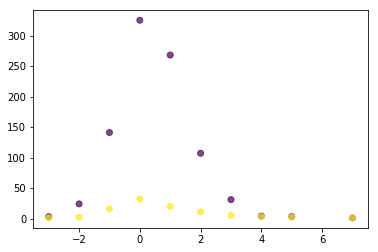

In [246]:
plt.scatter(x=score_diffs, y=names_by_score_dif['score'], c=gender_diffs, alpha=0.7)

In [112]:
descriptive_statistics_improved_names_sample1 = names_to_consider.describe()
descriptive_statistics_improved_names_sample1

,n_publs,score,score_2,score_dif
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.713000,1.71100,2.189000,0.478000
std,11.664677,1.08289,1.353185,1.220248
min,1.000000,0.00000,0.000000,-3.000000
25%,1.000000,1.00000,1.000000,0.000000
50%,1.000000,2.00000,2.000000,0.000000
75%,4.000000,3.00000,3.000000,1.000000
max,148.000000,3.00000,7.000000,7.000000


In [ ]:
print("Saving test names...")
descriptive_statistics_improved_names_sample1.to_csv("data/names_improvement_test_statistics.csv")
print("Test names saved!")

In [113]:
gender_changed = names_to_consider[names_to_consider['gender_dif'] == True]

In [132]:
gender_changed_more_certain = gender_changed[gender_changed['score_dif'] > 0]

In [133]:
gender_changed_more_certain.describe()

,n_publs,score,score_2,score_dif
count,42.000000,42.000000,42.000000,42.000000
mean,7.309524,0.333333,2.380952,2.047619
std,20.840261,0.570266,1.545290,1.396029
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,2.000000,2.000000
75%,2.750000,1.000000,3.000000,2.750000
max,124.000000,2.000000,7.000000,7.000000


In [129]:
score_improved = names_to_consider[names_to_consider['score_dif'] > 0]

In [130]:
score_improved.describe()

,n_publs,score,score_2,score_dif
count,456.000000,456.000000,456.000000,456.000000
mean,5.217105,1.515351,3.048246,1.532895
std,13.392101,1.155867,1.219745,0.873928
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.000000
50%,1.500000,2.000000,3.000000,1.000000
75%,4.000000,3.000000,4.000000,2.000000
max,148.000000,3.000000,7.000000,7.000000


In [ ]:
# The score stayed the same for 357 entries
# The score got worse in 187 entries, getting worse by max 3 pts, but 75% got worse by at max 1pt (mean=1.18, std=0.43)
# The score improved for 456 out of 1000 entries
# However, the gender assumption changed for only 74 of 1000 entries 
# (assuming the gender change is valid if the new score is higher than the old score, which is the case in 42 cases)
# The score improves on average by 0.47 with a std of 1.22. 
# The mean is 0, the 25% quartile is 0, the 75% quartile is 1.
# The score is at maximum improved by 7.

In [131]:
names_to_consider.describe()

,n_publs,score,score_2,score_dif
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.713000,1.71100,2.189000,0.478000
std,11.664677,1.08289,1.353185,1.220248
min,1.000000,0.00000,0.000000,-3.000000
25%,1.000000,1.00000,1.000000,0.000000
50%,1.000000,2.00000,2.000000,0.000000
75%,4.000000,3.00000,3.000000,1.000000
max,148.000000,3.00000,7.000000,7.000000
